# DIABETES PREDICTION 

In [25]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#loading the dataset
df = pd.read_csv('diabetes.csv')

In [27]:
#shows the first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
#shows the last 5 rows
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [29]:
# determines the type of a variable
type(df)

pandas.core.frame.DataFrame

In [30]:
#describes the data in structured format
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
#prints the number of rows & columns
df.shape

(768, 9)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Data Cleaning

In [33]:
#tells about the null values
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [44]:
#there are no null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [74]:
#IDENTIFYING OUTLIERS with zscore
df['zscore']=(df['Age']-df['Age'].mean())/df['Age'].std()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,zscore
0,6,148,72,35,0,33.6,0.627,50,1,1.425067
1,1,85,66,29,0,26.6,0.351,31,0,-0.190548
2,8,183,64,0,0,23.3,0.672,32,1,-0.105515
3,1,89,66,23,94,28.1,0.167,21,0,-1.040871
4,0,137,40,35,168,43.1,2.288,33,1,-0.020483
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,2.530487
764,2,122,70,27,0,36.8,0.340,27,0,-0.530677
765,5,121,72,23,112,26.2,0.245,30,0,-0.275580
766,1,126,60,0,0,30.1,0.349,47,1,1.169970


In [70]:
#removal of outliers
df_no_out=df[(df['zscore']<3) & (df['zscore']>-3)]

In [84]:
#dataset with no outliers
df_no_out.shape

(763, 9)

In [82]:
df=df_no_out

In [83]:
df.shape

(763, 9)

In [79]:
del df_no_out["zscore"]

# Data Visualization

In [86]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.282258,109.816532,68.258065,19.756048,69.225806,30.402823,0.428929,30.854839
1,4.868914,141.243446,70.782772,22.179775,100.711610,35.152434,0.551682,36.943820


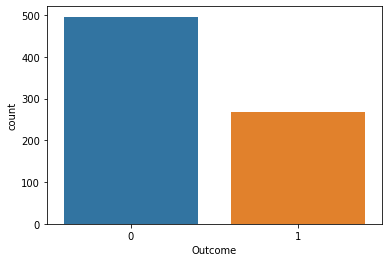

In [100]:
sns.countplot(x="Outcome", data=df)
plt.show()

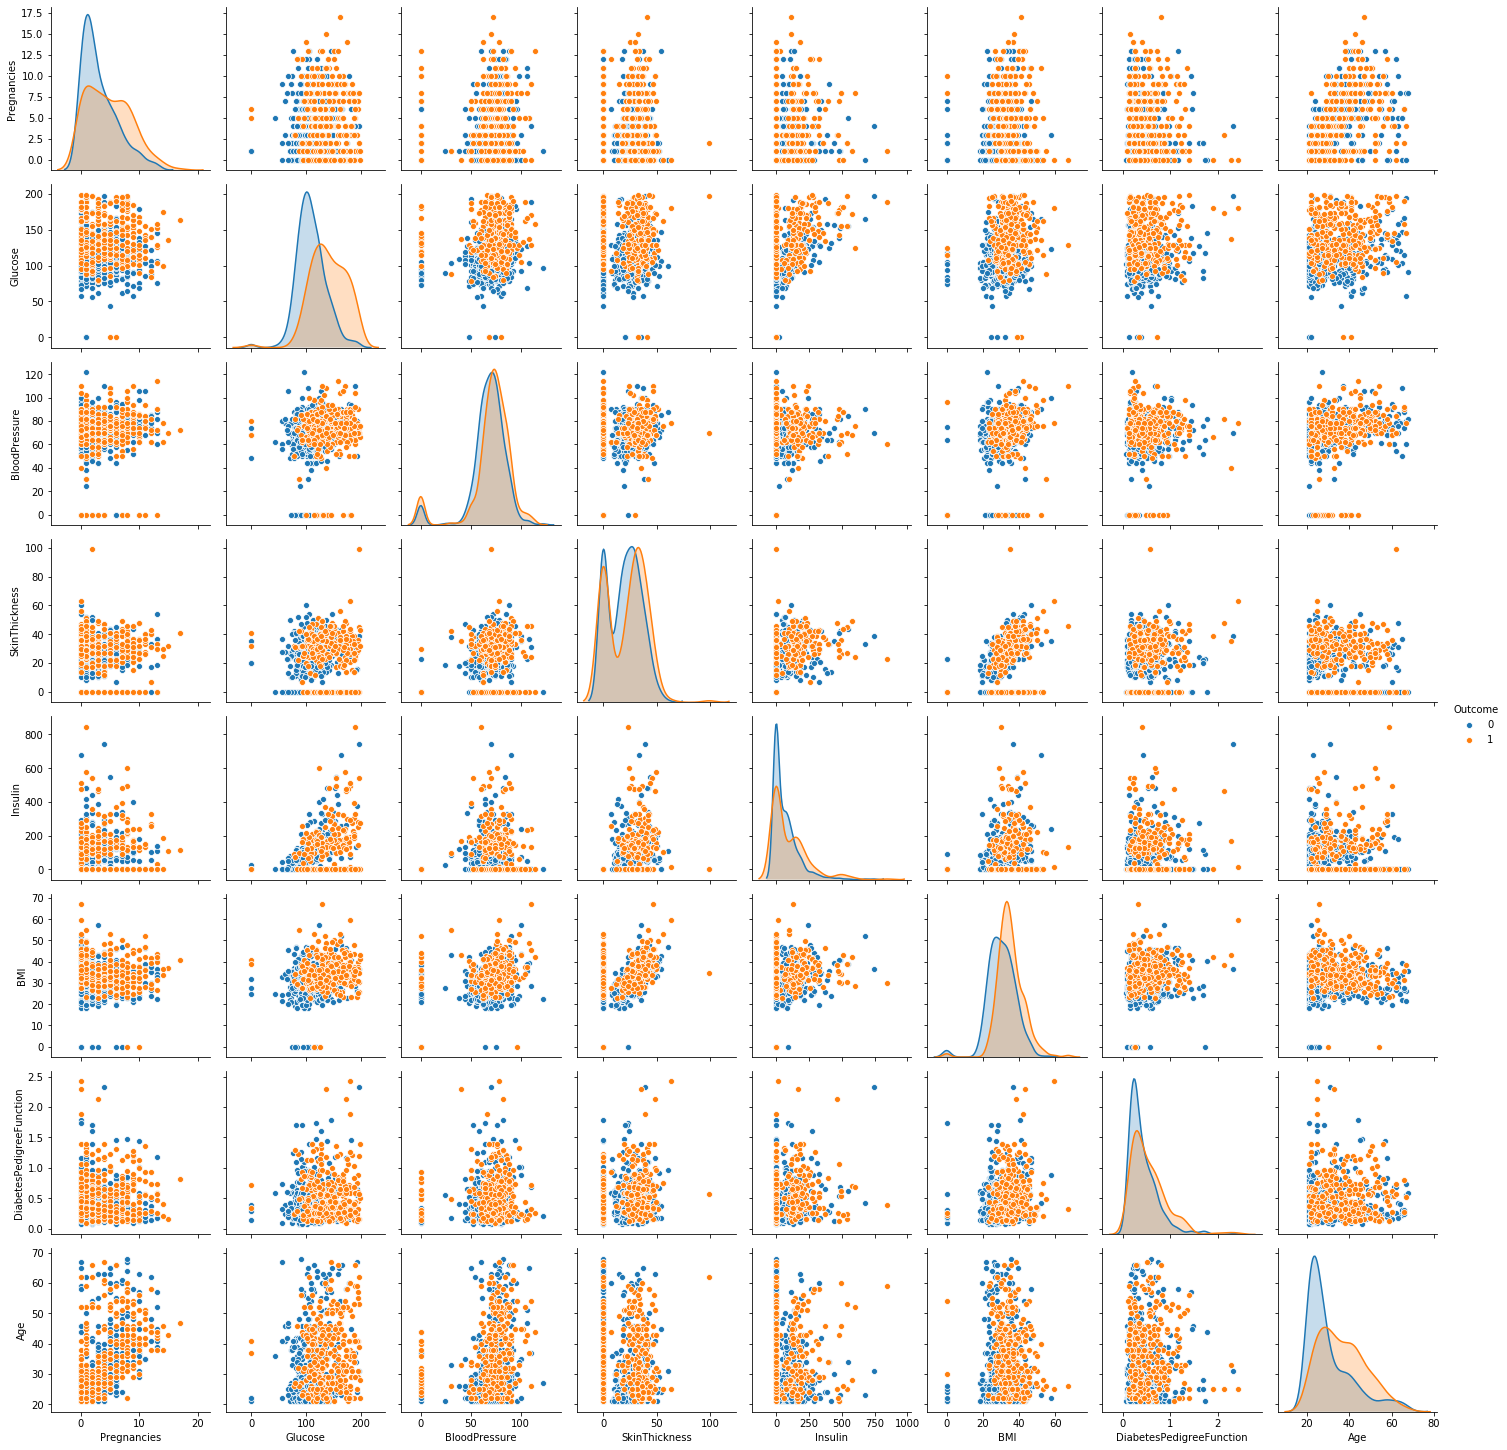

In [101]:
sns.pairplot(data=df, hue='Outcome')
plt.show()

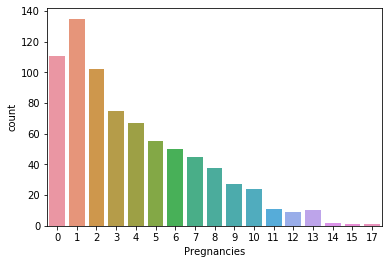

In [106]:
#Data Visualization of all columns

sns.countplot(df['Pregnancies'])

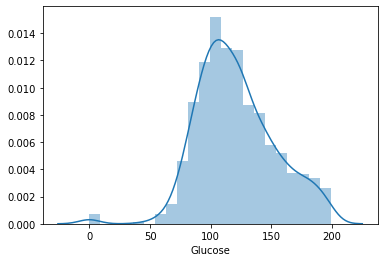

In [107]:
sns.distplot(df['Glucose'])

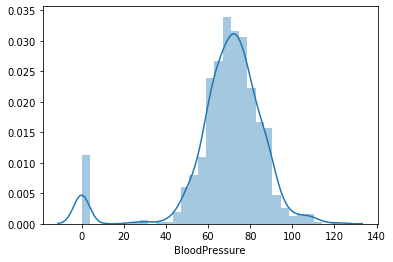

In [108]:
sns.distplot(df['BloodPressure'])

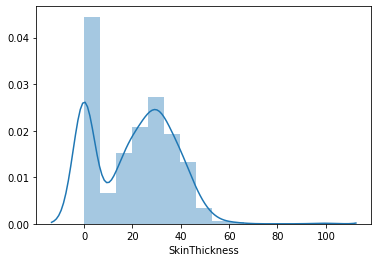

In [109]:
sns.distplot(df['SkinThickness'])

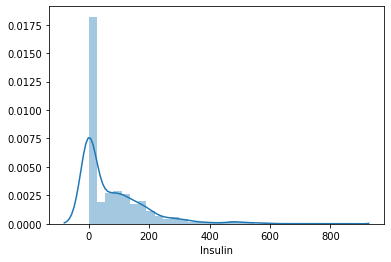

In [110]:
sns.distplot(df['Insulin'])

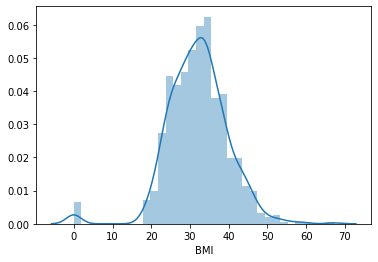

In [111]:
sns.distplot(df['BMI'])

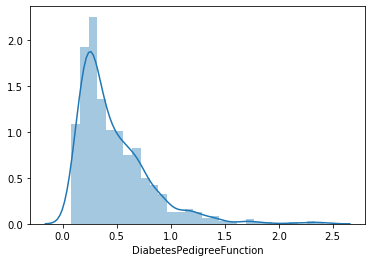

In [112]:
sns.distplot(df['DiabetesPedigreeFunction'])

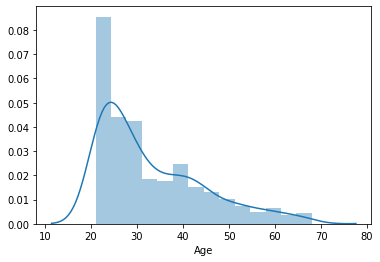

In [113]:
sns.distplot(df['Age'])

In [87]:
#COORELATION MATRIX
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128514,0.139181,-0.083442,-0.073248,0.020535,-0.032592,0.557373,0.224420
Glucose,0.128514,1.000000,0.152369,0.058610,0.333488,0.227267,0.138563,0.265266,0.467917
BloodPressure,0.139181,0.152369,1.000000,0.205953,0.088394,0.285007,0.047670,0.257850,0.062624
SkinThickness,-0.083442,0.058610,0.205953,1.000000,0.435464,0.389309,0.186053,-0.105942,0.072543
Insulin,-0.073248,0.333488,0.088394,0.435464,1.000000,0.194839,0.185641,-0.031076,0.130133
BMI,0.020535,0.227267,0.285007,0.389309,0.194839,1.000000,0.147030,0.069168,0.290394
DiabetesPedigreeFunction,-0.032592,0.138563,0.047670,0.186053,0.185641,0.147030,1.000000,0.034755,0.176552
Age,0.557373,0.265266,0.257850,-0.105942,-0.031076,0.069168,0.034755,1.000000,0.255812
Outcome,0.224420,0.467917,0.062624,0.072543,0.130133,0.290394,0.176552,0.255812,1.000000


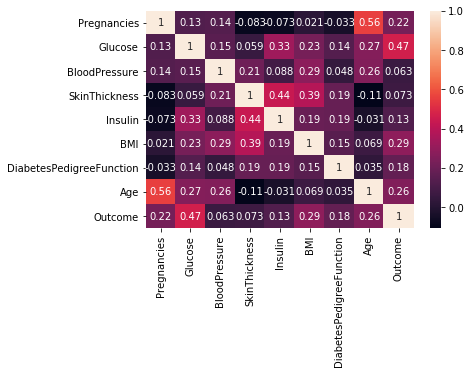

In [88]:
plt.figure()
sns.heatmap(df.corr(), annot=True)
plt.show()

# Machine Learning Models

In [115]:
#importing sklearn models libraries 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, auc, roc_curve, precision_recall_curve, classification_report, accuracy_score,log_loss, confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [116]:
x=df.drop(columns='Outcome')
y=df['Outcome']

In [117]:
#splitting the data for train & test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [118]:
x_train.shape, x_test.shape

((610, 8), (153, 8))

In [119]:
y_train.shape, y_test.shape

((610,), (153,))

In [178]:
print('LOGISTIC REGRESSION')

LOGISTIC REGRESSION


In [179]:
#Logistic Regression Model
lr=LogisticRegression()
lr.fit(x_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [180]:
print("Training set score: {:.3f}".format(lr.score(x_train, y_train))) 

Training set score: 0.785


In [181]:
print("Test set score: {:.3f}".format(lr.score(x_test, y_test)))

Test set score: 0.732


In [182]:
accuracy=lr.score(x_test, y_test)
print('Accuracy of model is: ')
print(accuracy*100)

Accuracy of model is: 
73.20261437908496


In [183]:
fpr, tpr, _=roc_curve(y_test, lr.predict_proba(x_test)[:,1])
roc_auc=auc(fpr, tpr)
fpr_tr, tpr_tr, thresholds_roc = roc_curve(y_train, lr.predict_proba(x_train)[:, 1])
roc_auc_tr = auc(fpr_tr, tpr_tr)

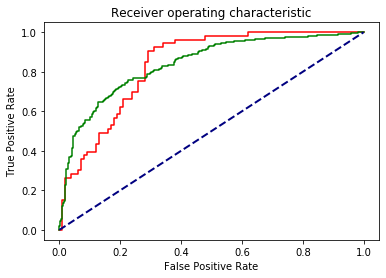

In [185]:
plt.plot(fpr, tpr, color="red")
plt.plot(fpr_tr,tpr_tr,color="green")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.show()

In [186]:
print('RANDOM FOREST CLASSIFIER')

RANDOM FOREST CLASSIFIER


In [187]:
#Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [188]:
y_pred=rf.predict(x_test)

In [189]:
accuracy=rf.score(x_test, y_test)
print('Accuracy of model is: ')
print(accuracy*100)

Accuracy of model is: 
69.93464052287581


In [190]:
fpr, tpr, _=roc_curve(y_test, rf.predict_proba(x_test)[:,1])
roc_auc=auc(fpr, tpr)
fpr_tr, tpr_tr, thresholds_roc = roc_curve(y_train, rf.predict_proba(x_train)[:, 1])
roc_auc_tr = auc(fpr_tr, tpr_tr)

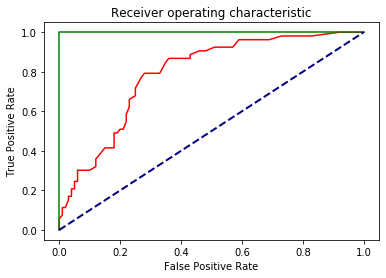

In [191]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color="red")
plt.plot(fpr_tr,tpr_tr,color="green")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.show()

In [192]:
print('NAIVE BAYES CLASSIFIER')

NAIVE BAYES CLASSIFIER


In [193]:
# Naive bayes classifier model
from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes import BernoulliNB
#from sklearn.naive_bayes import MultinomialNB

In [194]:
nb=GaussianNB()

In [195]:
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [196]:
nbpred=nb.predict(x_test)

In [197]:
nbpred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0],
      dtype=int64)

In [198]:
print("Accuracy:",metrics.accuracy_score(y_test, nbpred))
print("Precision:",metrics.precision_score(y_test, nbpred))
print("Recall:",metrics.recall_score(y_test, nbpred))

Accuracy: 0.7124183006535948
Precision: 0.6046511627906976
Recall: 0.49056603773584906
